In [348]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing  import LabelEncoder     #Mengubah kategorik menjadi dummy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [349]:
#Data Import
train = pd.read_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/train.csv")
test = pd.read_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/test.csv")
print(train.head())
print(train.info())

  job_level  job_duration_in_current_job_level person_level  \
0      JG04                           1.352775         PG03   
1      JG04                           1.292285         PG03   
2      JG05                           2.565151         PG06   
3      JG05                           2.828427         PG06   
4      JG05                           2.828427         PG06   

   job_duration_in_current_person_level  job_duration_in_current_branch  \
0                              1.352775                        1.732051   
1                              1.292285                        1.039230   
2                              2.308679                        1.780449   
3                              1.000000                        1.385641   
4                              2.828427                        0.707107   

  Employee_type  gender   age marital_status_maried(Y/N)  \
0     RM_type_A       2  1985                          Y   
1     RM_type_A       2  1989                     

In [350]:
#Menghilangkan Missing Value
train = train.dropna()

In [351]:
#train['Last_achievement_%'] = train.groupby(['age', 'number_of_dependences'])['Last_achievement_%'].apply(lambda x: x.fillna(x.median()))
#train['Achievement_above_100%_during3quartal'] = train.groupby(['Last_achievement_%'])['Achievement_above_100%_during3quartal'].apply(lambda x: x.fillna(x.median()))

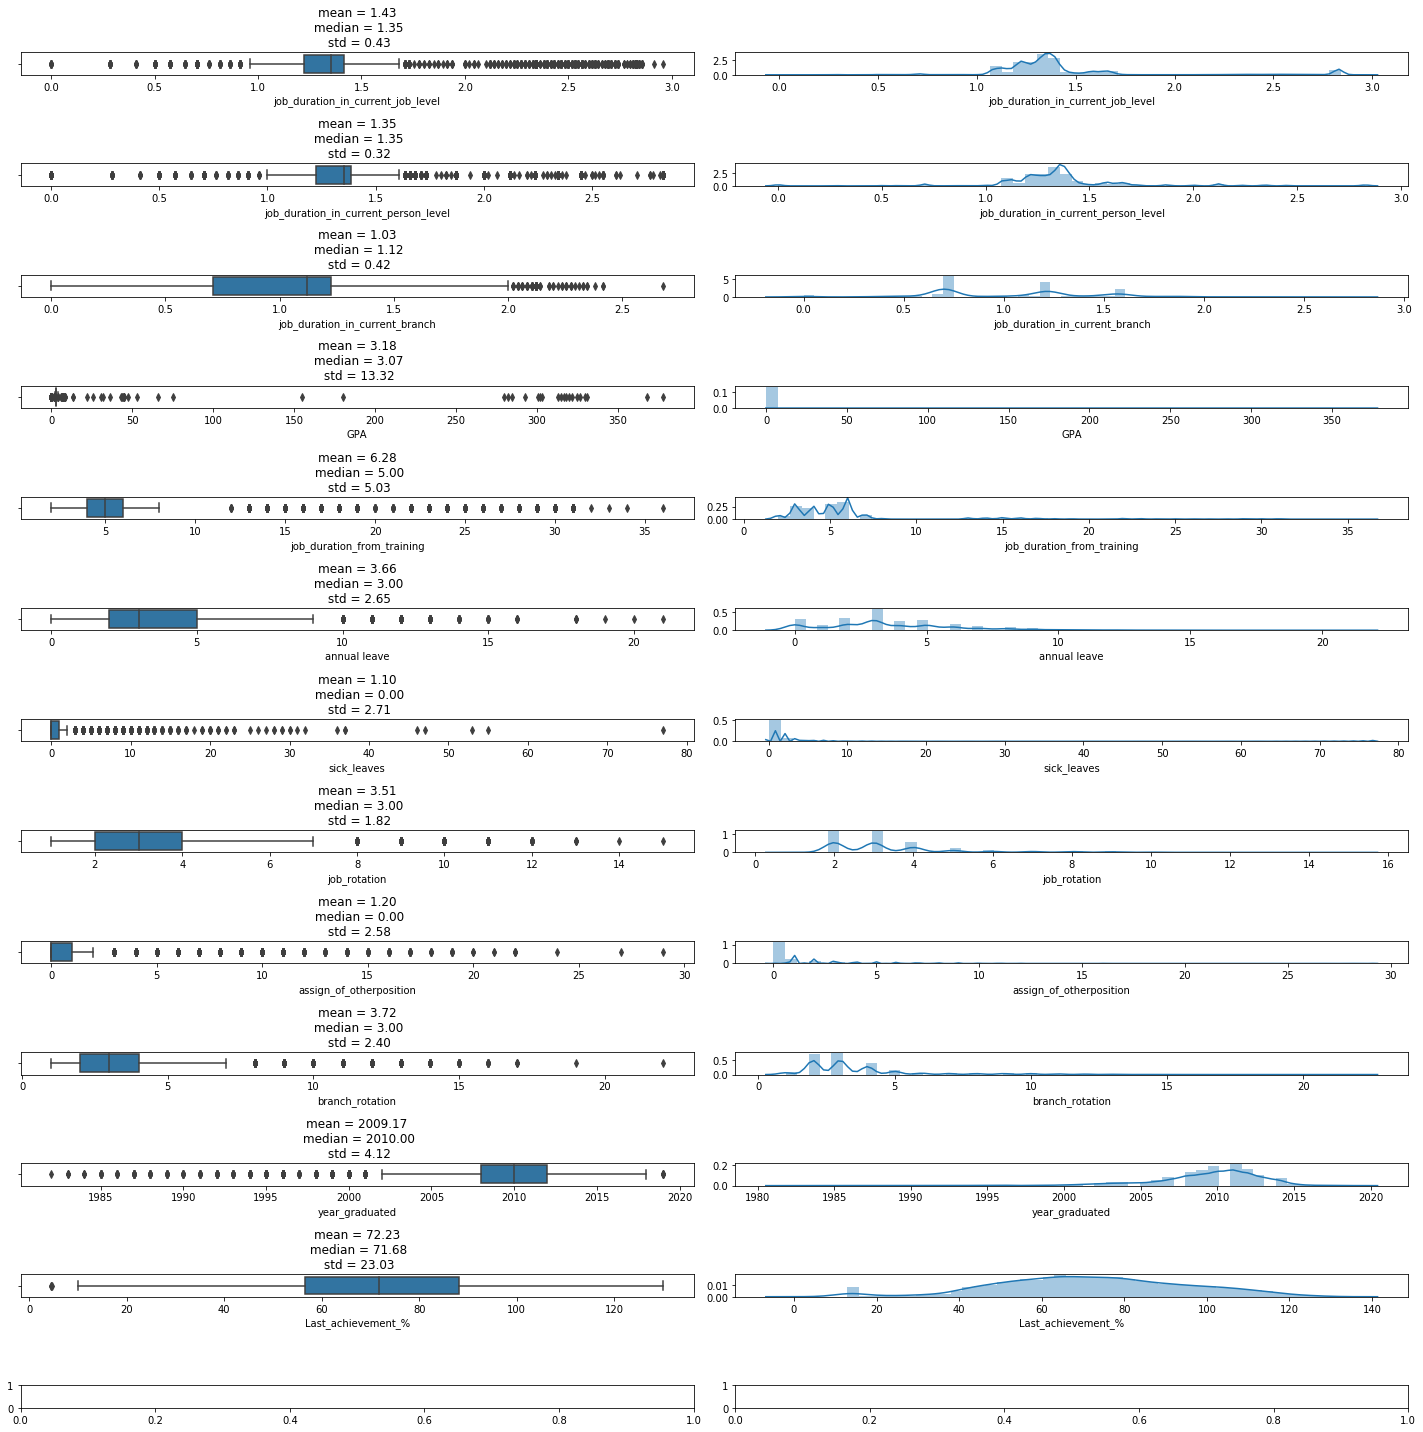

In [352]:
## Deskriptiv Statistics
# Fungsi untuk membuat plot  
def sebarandata(features):  
    fig, axs = plt.subplots(13, 2, figsize=(20, 20))
    for i, kol in enumerate(features):
	    sns.boxplot(train[kol], ax = axs[i][0])
	    sns.distplot(train[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(train[kol].mean(), train[kol].median(), train[kol].std()))
    plt.tight_layout()
    plt.show()
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch','GPA','job_duration_from_training','annual leave','sick_leaves','job_rotation','assign_of_otherposition', 'branch_rotation',
'year_graduated','Last_achievement_%']
sebarandata(kolom_numerik)

In [353]:
#GPA 
#gpa_train_mean = train['GPA'].mean()
#train.loc[train['GPA']  < 1.5, 'GPA'] = gpa_train_mean
#train.loc[train['GPA'] > 4, 'GPA'] = gpa_train_mean

In [354]:
#GPA 
#gpa_test_mean = test['GPA'].mean()
#test.loc[test['GPA']  < 1.5, 'GPA'] = gpa_test_mean
#test.loc[test['GPA'] > 4, 'GPA'] = gpa_test_mean

In [355]:
#GPA MODIFICATION
train.loc[train['GPA'] <1.5   , 'GPA'] = train.groupby(['age', 'number_of_dependences'])['Last_achievement_%'].apply(lambda x: x.replace(x.median()))
train.loc[train['GPA'] > 4 , 'GPA'] = train.groupby(['age', 'number_of_dependences'])['Last_achievement_%'].apply(lambda x: x.replace(x.median()))

In [356]:
test.loc[test['GPA'] < 1.5  , 'GPA'] = test.groupby(['age', 'number_of_dependences'])['Last_achievement_%'].apply(lambda x: x.replace(x.median()))
test.loc[test['GPA'] > 4 , 'GPA'] = test.groupby(['age', 'number_of_dependences'])['Last_achievement_%'].apply(lambda x: x.replace(x.median()))

In [357]:
train['age'] = 2021 - train['age']
test['age'] = 2021 - test['age']

In [358]:
# Standardisasi
df_std = StandardScaler().fit_transform(train[kolom_numerik])
df_std_test = StandardScaler().fit_transform(test[kolom_numerik])
# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=train.index, columns=train[kolom_numerik].columns)
df_std_test = pd.DataFrame(data=df_std_test, index=test.index, columns=test[kolom_numerik].columns)

<Figure size 432x288 with 0 Axes>

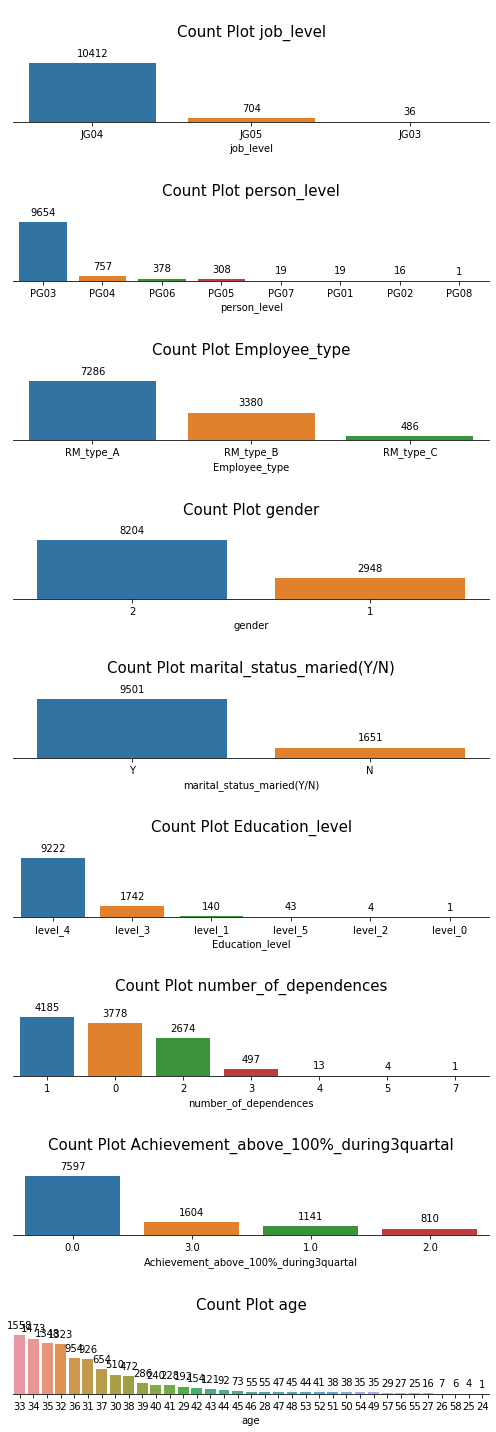

In [359]:
#sebaran data Katagorik
plt.clf() 
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['job_level','person_level', 'Employee_type','gender', 'marital_status_maried(Y/N)','Education_level',              'number_of_dependences','Achievement_above_100%_during3quartal','age'] 
# Membuat canvas
fig, axs = plt.subplots(9,1,figsize=(7,20)) 
# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(train[kol], order = train[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points')      
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.tight_layout()

# Tampilkan plot
plt.show()

In [360]:
frames = [train, test]

In [361]:
encoded_features = []

for df in frames:
    for feature in kolom_kategorikal:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

In [362]:
train = pd.concat([train, *encoded_features[:9]], axis=1)
test = pd.concat([test, *encoded_features[9:]], axis=1)

In [363]:
train['age'] = pd.qcut(train['age'], 5)


In [364]:
# Membuat salinan data frame
df_encode = train[kolom_kategorikal].copy()
# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
		df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

In [365]:
# Membuat salinan data frame
df_encode_test = test[kolom_kategorikal].copy()
# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
		df_encode_test[col] = LabelEncoder().fit_transform(df_encode_test[col])

In [366]:
test.loc[test['job_level'] == 3, 'job_level'] = 2

In [367]:
test = df_encode_test.merge(df_std_test, left_index = True, right_index=True, how = 'left')

In [368]:
X =  df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
Y =  train['Best Performance'].values

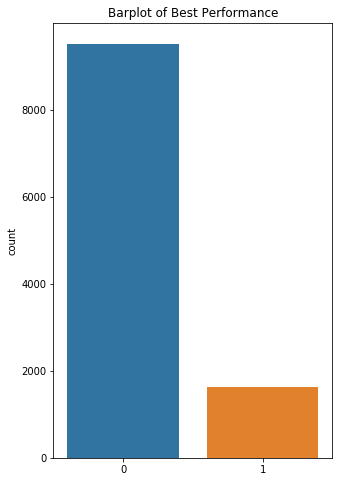

In [369]:
## Count Plot Best Performance
plt.figure(figsize = (5, 8))
sns.countplot(x = Y)
plt.title("Barplot of Best Performance")
plt.show()

In [370]:
# CONFIG
SEED = 2021

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, 
                                                      random_state = SEED, stratify = Y)

In [373]:
from sklearn.ensemble import RandomForestClassifier

In [374]:
#Modeling
model = RandomForestClassifier(random_state = SEED)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2021)

In [375]:
## Cek Model
from sklearn.metrics import *

In [376]:
pred = model.predict_proba(X_valid)
model_auc = roc_auc_score(Y_valid, pred[:, 1])
print(f"AUC score untuk model adalah sebesar : {model_auc}")

AUC score untuk model adalah sebesar : 0.5855064502865365


In [377]:
import xgboost as xgb

In [378]:
from xgboost.sklearn import XGBClassifier

In [379]:
#Modeling
model1 = XGBClassifier()
model1.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)])

[00:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.56399
[1]	validation_0-logloss:0.49675
[2]	validation_0-logloss:0.45823
[3]	validation_0-logloss:0.43646
[4]	validation_0-logloss:0.42441
[5]	validation_0-logloss:0.41765
[6]	validation_0-logloss:0.41387
[7]	validation_0-logloss:0.41197
[8]	validation_0-logloss:0.41204
[9]	validation_0-logloss:0.41134
[10]	validation_0-logloss:0.41171
[11]	validation_0-logloss:0.41287
[12]	validation_0-logloss:0.41223
[13]	validation_0-logloss:0.41260
[14]	validation_0-logloss:0.41314
[15]	validation_0-logloss:0.41418
[16]	validation_0-logloss:0.41575
[17]	validation_0-logloss:0.41662
[18]	validation_0-logloss:0.41650
[19]	validation_0-logloss:0.41680
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [380]:
pred1 = model1.predict_proba(X_valid)
model_auc = roc_auc_score(Y_valid, pred1[:, 1])
print(f"AUC score untuk model adalah sebesar : {model_auc}")

AUC score untuk model adalah sebesar : 0.5566231079587798


In [381]:
from catboost import CatBoostClassifier

In [382]:
model2 = CatBoostClassifier()
model2.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)])

	best: 0.4091786 (116)	total: 6.04s	remaining: 1.72s
779:	learn: 0.2583677	test: 0.4236520	best: 0.4091786 (116)	total: 6.05s	remaining: 1.71s
780:	learn: 0.2581506	test: 0.4236214	best: 0.4091786 (116)	total: 6.06s	remaining: 1.7s
781:	learn: 0.2580400	test: 0.4236241	best: 0.4091786 (116)	total: 6.07s	remaining: 1.69s
782:	learn: 0.2578306	test: 0.4236776	best: 0.4091786 (116)	total: 6.08s	remaining: 1.68s
783:	learn: 0.2577357	test: 0.4237269	best: 0.4091786 (116)	total: 6.08s	remaining: 1.68s
784:	learn: 0.2575297	test: 0.4238840	best: 0.4091786 (116)	total: 6.09s	remaining: 1.67s
785:	learn: 0.2573030	test: 0.4241326	best: 0.4091786 (116)	total: 6.1s	remaining: 1.66s
786:	learn: 0.2570670	test: 0.4242079	best: 0.4091786 (116)	total: 6.11s	remaining: 1.65s
787:	learn: 0.2569178	test: 0.4242325	best: 0.4091786 (116)	total: 6.11s	remaining: 1.64s
788:	learn: 0.2567473	test: 0.4243180	best: 0.4091786 (116)	total: 6.12s	remaining: 1.64s
789:	learn: 0.2566233	test: 0.4243465	best: 0.409

In [383]:
pred2 = model2.predict_proba(X_valid)
model_auc = roc_auc_score(Y_valid, pred2[:, 1])
print(f"AUC score untuk model adalah sebesar : {model_auc}")

AUC score untuk model adalah sebesar : 0.5855289363451803


In [384]:
from lightgbm.sklearn import LGBMClassifier

In [385]:
model3 = LGBMClassifier()
model3.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)])

[1]	valid_0's binary_logloss: 0.414444
[2]	valid_0's binary_logloss: 0.412321
[3]	valid_0's binary_logloss: 0.411114
[4]	valid_0's binary_logloss: 0.410373
[5]	valid_0's binary_logloss: 0.409505
[6]	valid_0's binary_logloss: 0.40873
[7]	valid_0's binary_logloss: 0.408747
[8]	valid_0's binary_logloss: 0.408734
[9]	valid_0's binary_logloss: 0.408887
[10]	valid_0's binary_logloss: 0.408771
[11]	valid_0's binary_logloss: 0.408633
[12]	valid_0's binary_logloss: 0.40832
[13]	valid_0's binary_logloss: 0.407768
[14]	valid_0's binary_logloss: 0.407712
[15]	valid_0's binary_logloss: 0.407866
[16]	valid_0's binary_logloss: 0.407727
[17]	valid_0's binary_logloss: 0.407432
[18]	valid_0's binary_logloss: 0.407074
[19]	valid_0's binary_logloss: 0.406862
[20]	valid_0's binary_logloss: 0.406793
[21]	valid_0's binary_logloss: 0.406074
[22]	valid_0's binary_logloss: 0.406212
[23]	valid_0's binary_logloss: 0.406193
[24]	valid_0's binary_logloss: 0.406369
[25]	valid_0's binary_logloss: 0.406268
[26]	valid_

LGBMClassifier()

In [386]:
pred3 = model3.predict_proba(X_valid)
model_auc = roc_auc_score(Y_valid, pred3[:, 1])
print(f"AUC score untuk model adalah sebesar : {model_auc}")

AUC score untuk model adalah sebesar : 0.5997497622902372


In [387]:
model_pred = model3.predict_proba(test)

In [388]:
sample = pd.read_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/sample_submission.csv")
sample["Best Performance"] = model_pred[:, 1]
sample.to_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/LGBM-OHE(GPA Mod).csv", index = False)